In [35]:
from skimage.io import imread
from napari_workflow_optimizer import Optimizer, Workflow
import pyclesperanto_prototype as cle

import yaml

%matplotlib notebook

In [19]:
w = Workflow()
# define background subtraction
w.set("deblurred", cle.gaussian_blur, "input", sigma_x=5, sigma_y=5)
# define segmentation
w.set("binarized", cle.threshold_otsu, "deblurred")
w.set("labeled", cle.label, "binarized")

In [32]:
input_image = imread(r'E:\BiAPoL\Projects\napari_workflow_hackathon_2022\data\P2\CS1\20211229 P2 CS1 Cell A0001f.tif')[1]
workflow_dir = r'E:\BiAPoL\Projects\napari_workflow_hackathon_2022\workflows\workflow.yml'

<IPython.core.display.Javascript object>


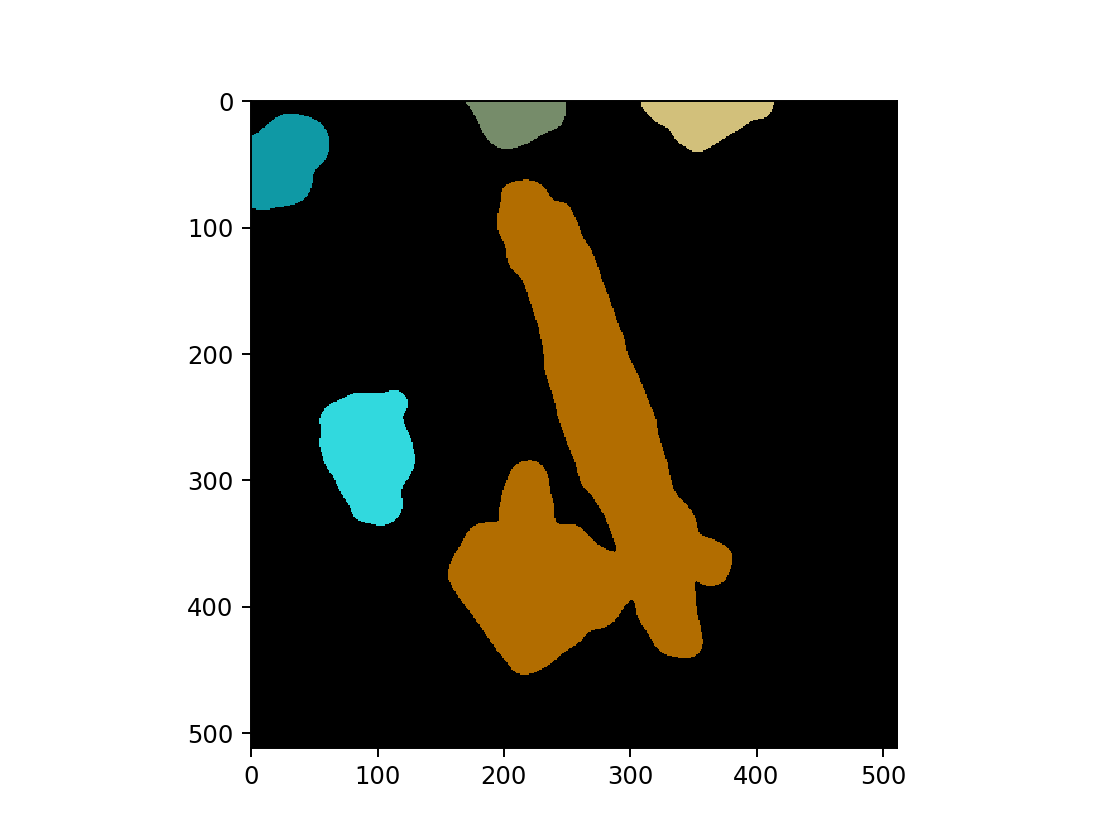

In [33]:
w.set("input", input_image)
result = w.get("labeled")

output = cle.imshow(result, labels=True)

In [48]:
print(w)

Workflow:
deblurred <- (<function gaussian_blur at 0x000002AA466A4AF0>, 'input', None, 5, 5, 0)
binarized <- (<function threshold_otsu at 0x000002AA57F94430>, 'deblurred')
labeled <- (<function connected_components_labeling_box at 0x000002AA4678A670>, 'binarized')
input <- [[381 480 365 ... 508 375 501]
 [412 362 238 ... 246 394 363]
 [373 471 505 ... 217 237 403]
 ...
 [471 329 439 ... 237 443 243]
 [246 335 213 ... 209 205 507]
 [470 206 211 ... 501 422 343]]

